In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


from typing import Literal, Any, Union, Callable


mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["grid.color"] = "gainsboro"

# Set Random State

In [2]:
SEED = 43765238

np.random.seed(SEED)
random.seed(SEED)

# Load datasets

In [3]:
PATH_TRAIN_DATASET = "../../datasets/train.csv"
PATH_TEST_DATASET = "../../datasets/test.csv"

train_df = pd.read_csv(PATH_TRAIN_DATASET, index_col=0)
test_df = pd.read_csv(PATH_TEST_DATASET, index_col=0)

# Explore train data

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From kaggle:

**pclass**: A proxy for socio-economic status (SES)  
&emsp; 1st = Upper  
&emsp; 2nd = Middle  
&emsp; 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...  
&emsp; Sibling = brother, sister, stepbrother, stepsister  
&emsp; Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...  
&emsp; Parent = mother, father  
&emsp; Child = daughter, son, stepdaughter, stepson  
&emsp; Some children travelled only with a nanny, therefore parch=0 for them.

**embarked**: Port of Embarkation  
&emsp; C = Cherbourg  
&emsp; Q = Queenstown  
&emsp; S = Southampton

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


`Age`, `Cabin` and `Embarked` columns have missing values.

`Name`, `Sex`, `Ticket`, `Cabin` and `Embarked` columns contain string values.

In [6]:
train_df.Ticket.unique().size

681

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


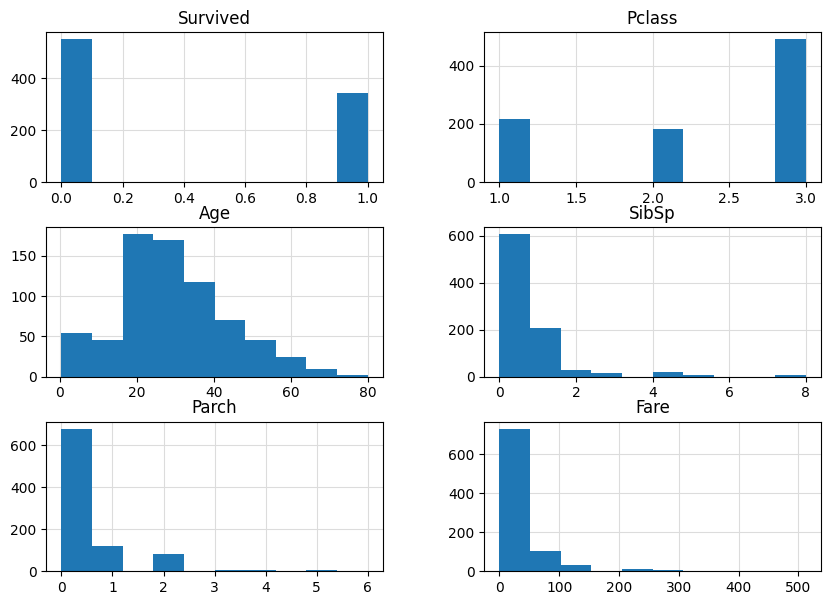

In [8]:
axs = train_df.hist(figsize=(10, 7))

In [9]:
def cmap_hist_by(
    *,
    value: np.ndarray,
    patches: mpl.container.BarContainer,
    ax: mpl.axes.Axes,
    clb_title: str,
    cm: str = "seismic_r",
):
    cmap = plt.get_cmap(cm)

    for v, p in zip(value, patches):
        plt.setp(p, "facecolor", cmap(v))

    clb = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ax=ax)
    clb.set_label(clb_title)

In [10]:
def get_survived_cuts_mean(
    df: pd.DataFrame, column_cutted: str, bins: int or list, retbins: bool = True
) -> np.ndarray:
    survived_cuts, survived_bins = pd.cut(
        df[column_cutted], bins=10, right=False, retbins=retbins
    )

    survived_cuts_mean = df.groupby(survived_cuts).Survived.mean().to_numpy()

    if retbins:
        return survived_cuts_mean, survived_bins
    return survived_cuts_mean

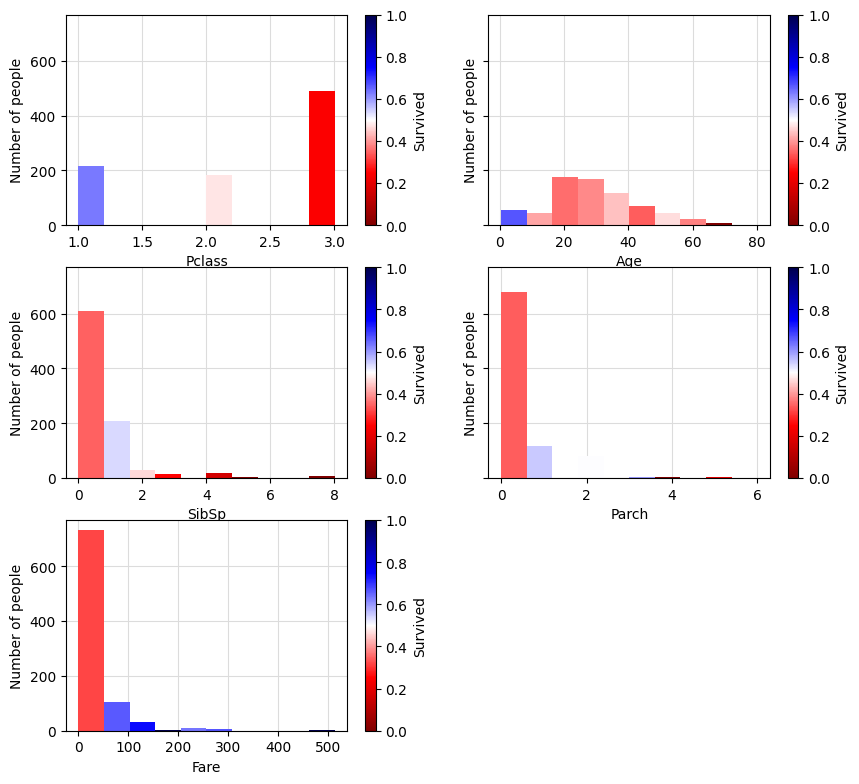

In [11]:
train_df_numeric = train_df.select_dtypes("number")
_columns = train_df_numeric.columns.drop("Survived")

fig, axs = plt.subplots(3, 2, figsize=(2 * 5, 3 * 3.1), sharey=True)
axs[2, 1].set_axis_off()

for ax, col in zip(axs.flatten(), _columns):
    survived_cuts_mean, survived_bins = get_survived_cuts_mean(train_df, col, bins=10)
    n, bins, patches = ax.hist(train_df_numeric[col], bins=survived_bins)

    cmap_hist_by(
        value=survived_cuts_mean,
        patches=patches,
        ax=ax,
        clb_title="Survived",
    )

    ax.set_ylabel("Number of people")
    ax.set_xlabel(col)

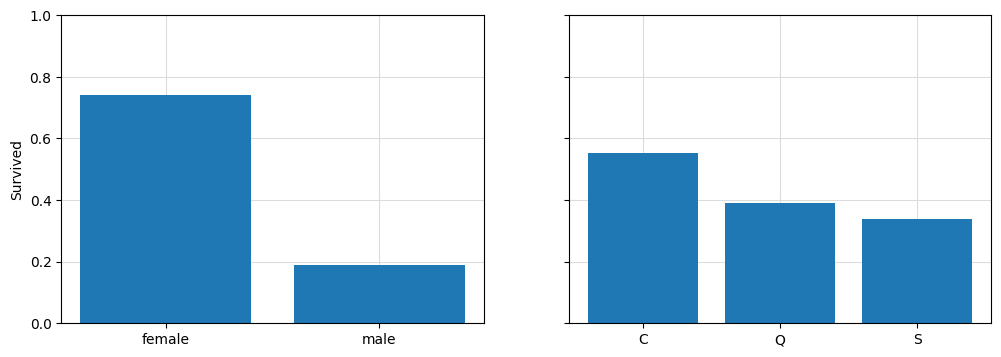

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(2 * 6, 4), sharey=True)

sex_survived_mean = train_df.groupby("Sex", as_index=False).Survived.mean().to_numpy()
embarked_survived_mean = (
    train_df.groupby("Embarked", as_index=False).Survived.mean().to_numpy()
)

axs[0].bar(sex_survived_mean[:, 0], sex_survived_mean[:, 1])
axs[1].bar(embarked_survived_mean[:, 0], embarked_survived_mean[:, 1])

axs[0].set_ylabel("Survived")

for ax in axs.flatten():
    ax.set_ylim(0, 1)

# Pre-process data to feed ML model

`Cabin` has so much missing values that probably the best approach is to <font color='red'>remove</font> this column. 

`Name` holds no critical information, so the best approach is to <font color='red'>remove</font> this column.  

`Ticket` has 681 unique values among the 891, probably we won't find any correlation between  
survived ones and its tickets, so the best approach is to <font color='red'>remove</font> this column.  

`Embarked` has 2 missing values. We will fill these values with the <font color='yellow'>most frequent value</font> for  
this column.  

`Age` has almost 200 missing values. We'll fill these values with a <font color='yellow'>median of the ages</font>.

`Sex` and `Embarked` are columns containing categorical values. We need to convert these  
categories to numbers using an enconder.

The Ordinal Encoder does not seem a good idea since nor `Sex` nor `Embarked` have a relation  
of _order_ or _scale_. We will stick to the <font color="yellow">One Hot Encoder</font>.

In [13]:
COLUMNS_TO_REMOVE = ["Name", "Cabin", "Ticket"]
COLUMNS_TO_FILL_MISSING_VALUES_MODE = ["Embarked"]
COLUMNS_TO_FILL_MISSING_VALUES_MEDIAN = ["Age"]


def fillna(
    df: pd.DataFrame,
    subset: str,
    method: Union[Literal["median"], Literal["mode"]] = "median",
) -> pd.DataFrame:
    if method == "median":
        df[subset] = df[subset].fillna(df[subset].median())
    elif method == "mode":
        df[subset] = df[subset].fillna(df[subset].mode().iloc[0])

    return df


train_data = (
    train_df
    .drop(columns=COLUMNS_TO_REMOVE)
    .pipe(fillna, subset=COLUMNS_TO_FILL_MISSING_VALUES_MEDIAN, method="median")
    .pipe(fillna, subset=COLUMNS_TO_FILL_MISSING_VALUES_MODE, method="mode")
)

train_labels = train_data.Survived.to_numpy()
train_data = train_data.drop(columns=["Survived"])

In [14]:
def transform_columns(df: pd.DataFrame, column: str, transformer) -> np.ndarray:
    return transformer.fit_transform(df[column])


def concatenate_transformed_column(df: pd.DataFrame, column: np.ndarray) -> np.ndarray:
    return np.c_[df.to_numpy(), column]

In [15]:
from sklearn.preprocessing import OneHotEncoder

COLUMNS_TO_ENCODE = ["Sex", "Embarked"]

one_hot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_one_hot_train = transform_columns(train_data, COLUMNS_TO_ENCODE, one_hot_enc)
train_data_trans = concatenate_transformed_column(
    train_data.drop(columns=COLUMNS_TO_ENCODE), cat_one_hot_train
)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_data_trans, train_labels)

KNeighborsClassifier()

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [18]:
_COLUMNS_TO_FILL_MISSING_VALUES_MEDIAN = ["Age", "Fare"]

test_data = (
    test_df
    .drop(columns=COLUMNS_TO_REMOVE)
    .pipe(fillna, subset=_COLUMNS_TO_FILL_MISSING_VALUES_MEDIAN, method="median")
    .pipe(fillna, subset=COLUMNS_TO_FILL_MISSING_VALUES_MODE, method="mode")
)

cat_one_hot_test = transform_columns(test_data, COLUMNS_TO_ENCODE, one_hot_enc)
test_data_trans = concatenate_transformed_column(
    test_data.drop(columns=COLUMNS_TO_ENCODE), cat_one_hot_test
)

test_data_trans

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 27. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 27. ,  1. , ...,  1. ,  0. ,  0. ]])

In [19]:
predictions = knn.predict(test_data_trans)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [20]:
predictions_df = pd.DataFrame(
    {
        "PassengerId": test_data.index.values,
        "Survived": predictions
    }
)

predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [21]:
predictions_df.to_csv(
    "../../datasets/first_attemptive_results.csv",
    columns=["PassengerId", "Survived"],
    index=False,
)